In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import seaborn as sns

Посчитала число нуклеотидов в таргетных регионах каждой панели:

In [2]:
! cat nsclc__target_regions.bed | awk -F'\t' 'BEGIN{SUM=0}{ SUM+=$3-$2 }END{print SUM}'

9440


In [3]:
! cat JOS_target_regions.bed | awk -F'\t' 'BEGIN{SUM=0}{ SUM+=$3-$2 }END{print SUM}'

5694


Разделила все bed файлы согласно номеру образца, панели и качеству регионов. Для каждого получила файл со долей регионов с низким/высоким качеством. Изменяла делитель в awk в зависимости от панели и название получаемого файла.

In [ ]:
import subprocess
import os
import re

# Get a list of all files in a working directory
files = os.listdir(".")

# Get the only bed files and sort them
bed_files = []
for file in files:
    if file.endswith('.bed'):
        bed_files.append(file)
bed_files.sort(key=lambda test_string: list(map(int, re.findall(r'\d+', test_string)))[0])

# Open file.bed, count the number of nucleotides in all regions and proportion of high/low nucleotides quality
for file in bed_files:
    my_stdin = open(file)
    command = "awk -F'\t' 'BEGIN{SUM=0}{ SUM+=$3-$2 }END{print SUM}' | awk '{print $1/9440}' >> TruQ4_HQR.txt"
    ret = subprocess.run(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, stdin=my_stdin)

##### NSCLC

In [6]:
df = pd.DataFrame()
TruQ4_h = pd.read_csv('TruQ4_HQR.txt', sep="\t", header=None)
Compr_h = pd.read_csv('Compr_HQR.txt', sep="\t", header=None)
TruQ4_l = pd.read_csv('TruQ4_LQR.txt', sep="\t", header=None)
Compr_l = pd.read_csv('Compr_LQR.txt', sep="\t", header=None)
df["Reads"] = pd.Series([50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 5000])
df["TruQ4_h"] = TruQ4_h[0]
df["Compr_h"] = Compr_h[0]
df["TruQ4_l"] = TruQ4_l[0]
df["Compr_l"] = Compr_l[0]
df

,Reads,TruQ4_h,Compr_h,TruQ4_l,Compr_l
0,50,0.072775,0.114195,0.927225,0.885805
1,100,0.329343,0.290572,0.670657,0.709428
2,200,0.682627,0.580614,0.317373,0.419386
3,300,0.806674,0.715890,0.193326,0.284110
4,400,0.856462,0.793644,0.143538,0.206356
5,500,0.896822,0.851377,0.103178,0.148623
6,600,0.916843,0.873517,0.083157,0.126483
7,700,0.924576,0.905508,0.075424,0.094492
8,800,0.951377,0.932309,0.048623,0.067691
9,900,0.960169,0.947140,0.039830,0.052860


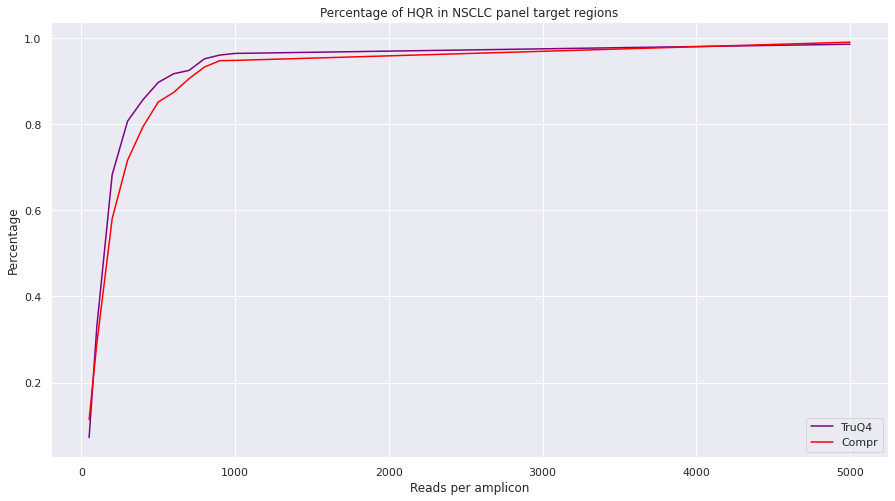

In [7]:
sns.set(rc = {'figure.figsize':(15,8)})
TruQ4_h = sns.lineplot(data=df, x="Reads", y="TruQ4_h", color = "purple")
TruQ4_h.set(title = "Percentage of HQR in NSCLC panel target regions")
TruQ4_h.set(ylabel= "Percentage", xlabel= "Reads per amplicon")
Compr_h = sns.lineplot(data=df, x="Reads", y="Compr_h", color = "red")
plt.legend(labels=["TruQ4","Compr"], loc = 4);

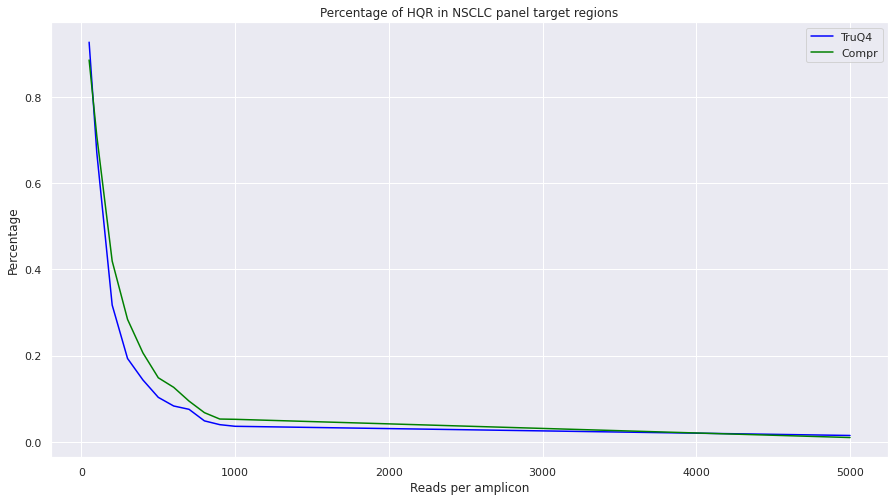

In [9]:
sns.set(rc = {'figure.figsize':(15,8)})
TruQ4_l = sns.lineplot(data=df, x="Reads", y="TruQ4_l", color = "blue")
TruQ4_l.set(title = "Percentage of HQR in NSCLC panel target regions")
TruQ4_l.set(ylabel= "Percentage", xlabel= "Reads per amplicon")
Compr_l = sns.lineplot(data=df, x="Reads", y="Compr_l", color = "green")
plt.legend(labels=["TruQ4","Compr"], loc = 1);

##### JOSX

In [ ]:
import subprocess
import os
import re

# Get a list of all files in a working directory
files = os.listdir(".")

# Get the only bed files and sort them
bed_files = []
for file in files:
    if file.endswith('.bed'):
        bed_files.append(file)
bed_files.sort(key=lambda test_string: list(map(int, re.findall(r'\d+', test_string)))[2])

# Open file.bed, count the number of nucleotides in all regions and proportion of high/low nucleotides quality
for file in bed_files:
    my_stdin = open(file)
    command = "awk -F'\t' 'BEGIN{SUM=0}{ SUM+=$3-$2 }END{print SUM}' | awk '{print $1/5694}' >> josx_24385_HQR.txt"
    ret = subprocess.run(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, stdin=my_stdin)

In [15]:
df = pd.DataFrame()
j_h = pd.read_csv('josx_24385_HQR.txt', sep="\t", header=None)
j_l = pd.read_csv('josx_24385_LQR.txt', sep="\t", header=None)
df["Reads"] = pd.Series([50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
df["JOSX_h"] = j_h[0]
df["JOSX_l"] = j_l[0]
df

,Reads,JOSX_h,JOSX_l
0,50,0.945381,0.054619
1,100,0.996312,0.003688
2,200,0.999824,0.000176
3,300,0.999824,0.000176
4,400,0.999824,0.000176
5,500,0.999824,0.000176
6,600,0.999824,0.000176
7,700,0.999824,0.000176
8,800,1.000000,0.000000
9,900,1.000000,0.000000


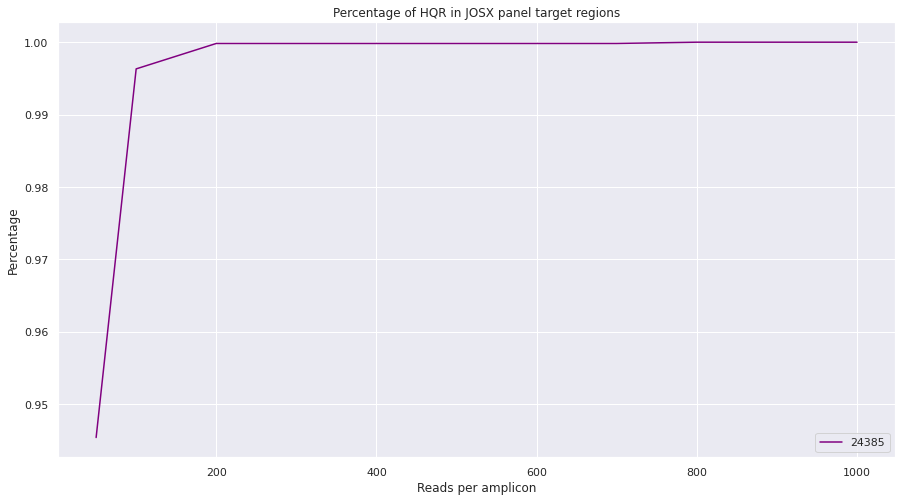

In [16]:
sns.set(rc = {'figure.figsize':(15,8)})
j_h = sns.lineplot(data=df, x="Reads", y="JOSX_h", color = "purple")
j_h.set(title = "Percentage of HQR in JOSX panel target regions")
j_h.set(ylabel= "Percentage", xlabel= "Reads per amplicon")
plt.legend(labels=["24385"], loc = 4);

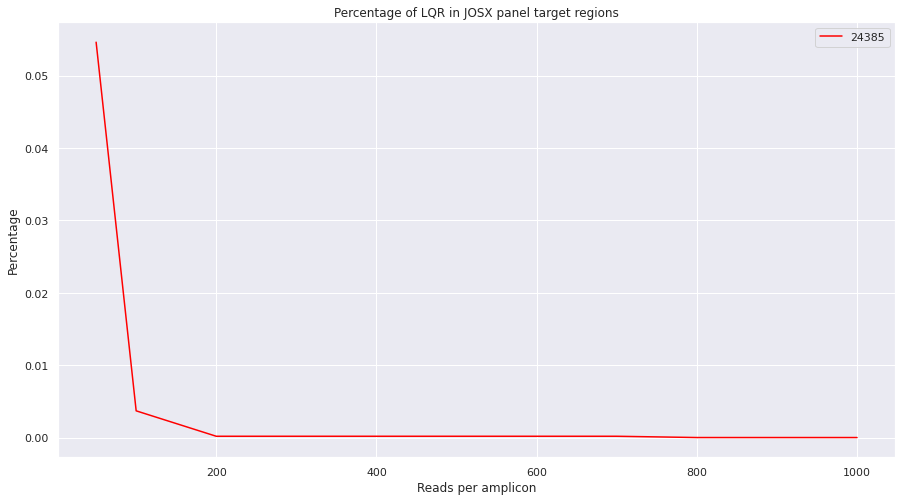

In [17]:
sns.set(rc = {'figure.figsize':(15,8)})
j_l = sns.lineplot(data=df, x="Reads", y="JOSX_l", color = "red")
j_l.set(title = "Percentage of LQR in JOSX panel target regions")
j_l.set(ylabel= "Percentage", xlabel= "Reads per amplicon")
plt.legend(labels=["24385"], loc = 1);